<a href="https://colab.research.google.com/github/Aras1703/K-means_Wine_clustering/blob/main/Wine_Clustering_using_K_Means_%26_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# MEMBACA FILE CSV MENGGUNAKAN PANDAS DAN MENAMPILKAN TIPE DATA DARI SETIAP ATRIBUTE

import pandas as pd

df = pd.read_csv('wine-clustering.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [ ]:
# CHECK NILAI "NULL" PADA DATASETS

df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [ ]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# STANDARISASI NILAI PADA DATASET

from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
df_cluster = df.copy()
df_cluster[df_cluster.columns]=std_scaler.fit_transform(df_cluster)

In [ ]:
# MEMBUAT OBJEK PCA DENGAN 2 PRINCIPAL COMPONENT DAN MENERAPKAN PCA PADA DATASET

from sklearn.decomposition import PCA
pca_2 = PCA(2)
pca_2_result = pca_2.fit_transform(df_cluster)

In [ ]:
# MEMBUAT LIST YANG BERISI INERTIA

import sklearn.cluster as cluster
from tqdm import tqdm

inertia = []
for i in tqdm(range(2,10)):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(df_cluster)
    inertia.append(kmeans.inertia_)

100%|██████████| 8/8 [00:00<00:00, 11.17it/s]


In [ ]:
# MEMBUAT LIST YANG BERISI SILHOUETTE SCORE

from sklearn.metrics import silhouette_score

silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(df_cluster)
    silhouette[i] = silhouette_score(df_cluster, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:00<00:00,  8.09it/s]


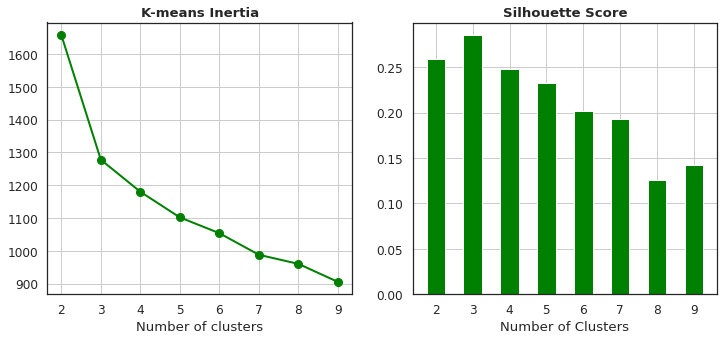

In [ ]:
# MEMBUAT VISUALISASI INERTIA DAN SILHOUETTE SCORE 
# KEDUA ALGORITMA TERSEBUT BERFUNGSI UNTUK MEMBANTU MENENTUKAN NOMOR DARI KLASTER (K)

sns.set(style='white',font_scale=1.1, rc={'figure.figsize':(12,5)})

plt.subplot(1, 2, 1)

plt.plot(range(2,len(inertia)+2), inertia, marker='o',lw=2,ms=8,color='green')
plt.xlabel('Number of clusters')
plt.title('K-means Inertia',fontweight='bold')
plt.grid(True)

plt.subplot(1, 2, 2)

plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',color= 'green',width=0.5)
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.grid()
plt.title('Silhouette Score',fontweight='bold')
plt.xlabel('Number of Clusters')


plt.show()


In [ ]:
# MODELLING MACHINE LEARNING DENGAN K-MEANS
# PCA DAN SILHOUETTE SCORE MENGINDIKASIKAN NILAI 3 ADALAH NILAI TERBAIK UNTUK N_CLUSTER

kmeans = cluster.KMeans(n_clusters=3,random_state=17,init='k-means++')
kmeans_labels = kmeans.fit_predict(df_cluster)

centroids = kmeans.cluster_centers_
centroids_pca = pca_2.transform(centroids)

pd.Series(kmeans_labels).value_counts()

0    65
2    62
1    51
dtype: int64

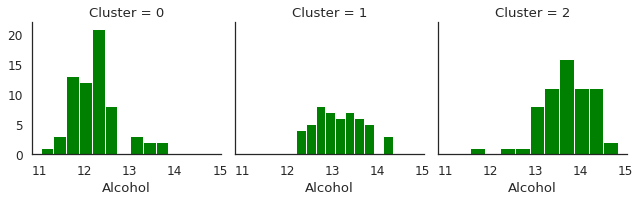

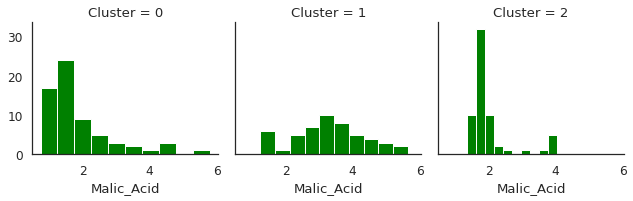

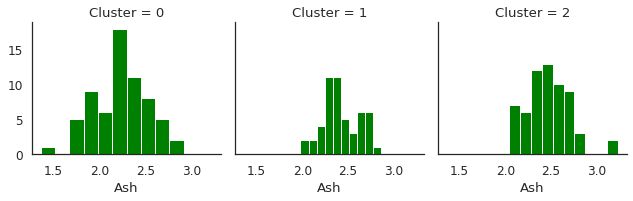

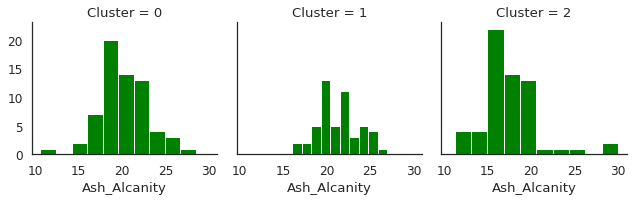

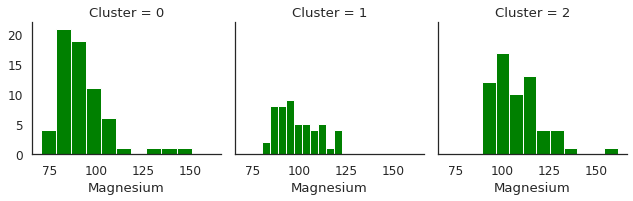

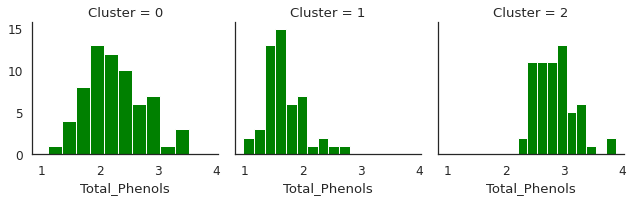

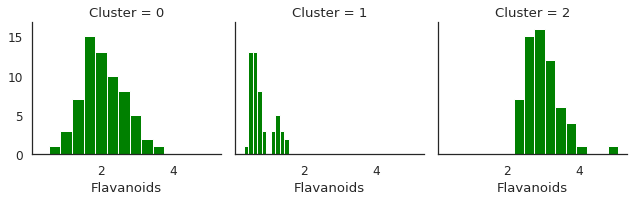

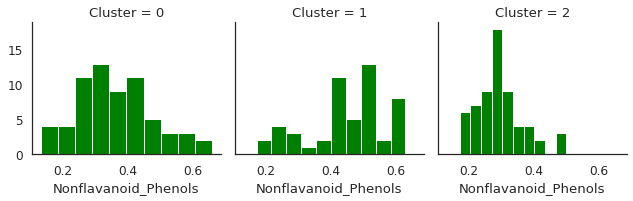

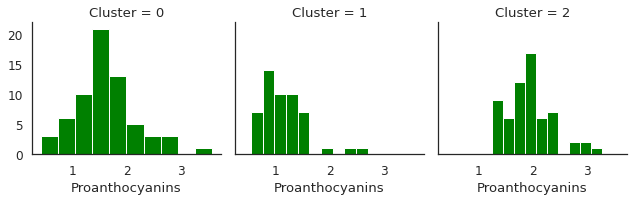

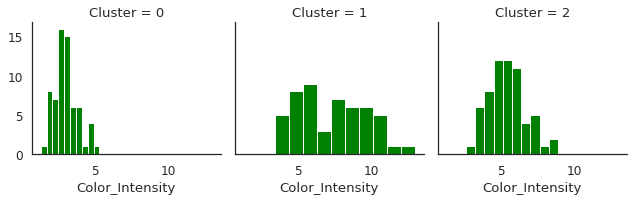

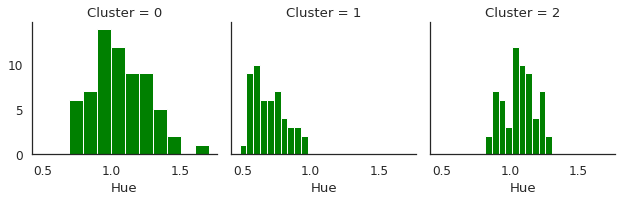

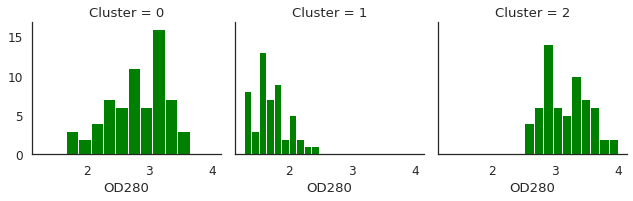

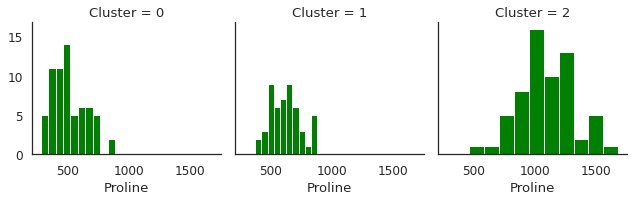

In [ ]:
# MEMBUAT VISUALISASI KLASTER DARI TIAP ATRIBUT

df2=df.copy()
df2['Cluster']=kmeans_labels

aux=df2.columns.tolist()
aux[0:len(aux)-1]

for cluster in aux[0:len(aux)-1]:
    grid= sns.FacetGrid(df2, col='Cluster')
    grid.map(plt.hist, cluster,color='green')

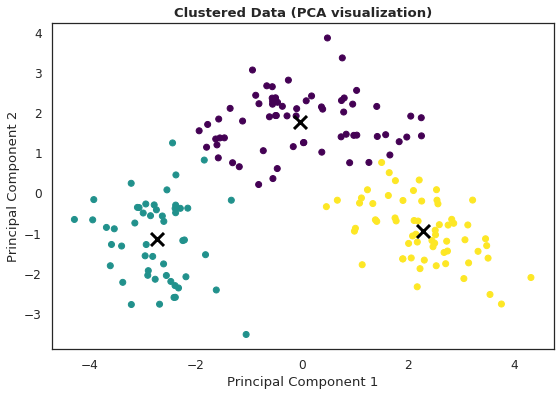

In [ ]:
# MEMBUAT VISUALISASI CLUSTER PCA

sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            marker='x', s=169, linewidths=3,
            color='black', zorder=10,lw=3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustered Data (PCA visualization)',fontweight='bold')
plt.show()